# Movie Quiz Project 
#### **Selam Mahmud Ali**  
#### *Coding for Data science - DSE*  
#### *26-11-2024* 


### **1. Introduction to the Project**

This project creates an interactive Quiz for movie lovers centered around films. 
The data is sourced from **IMDb database** (downloaded from Github of the 1000 top movies). 
To make the quiz dynamic and appropriately challenging, the system incorporates a difficulty-based criterion for generating plausible answer options. Additionally, the program enables players to answer these quizzes interactively and evaluates their performance with an overall score that reflects the difficulty level of each question answered. 
This approach ensures a personalized and fun quiz experience while providing meaningful insights into player performance.

Let's look at the steps to implement this program :





### **2. Data:**

#### **2.1 - Data Visualization**

First the dataset is visualized in order to understand some interesting metrics. 
In the following block is a code to generate a plot of the top 10 most voted movies. 

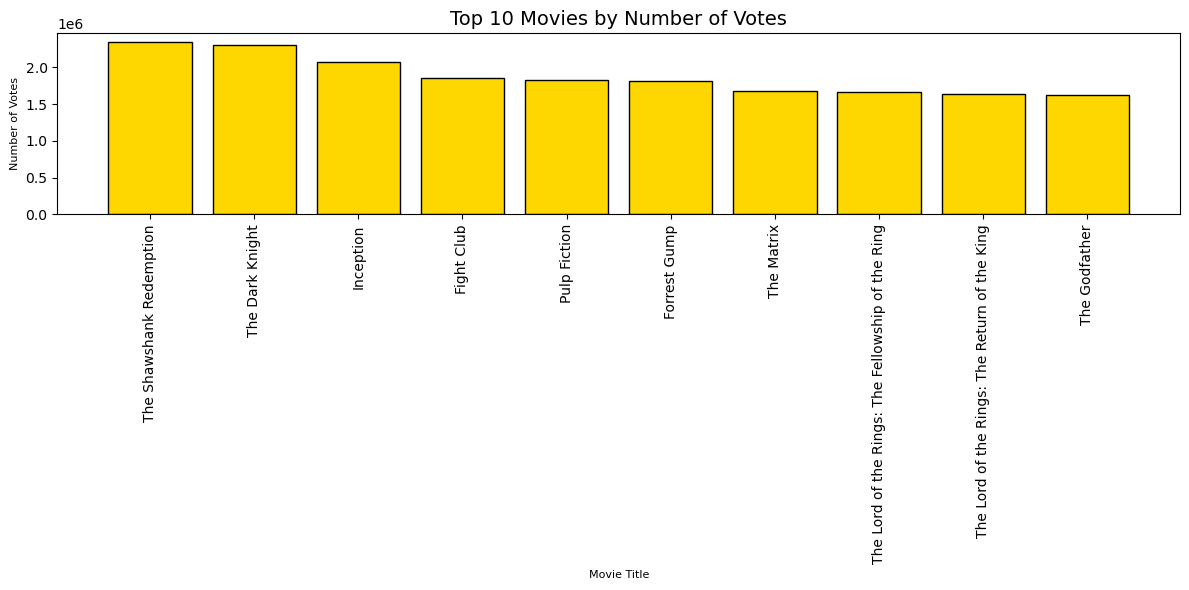

In [6]:

import pandas as pd
import matplotlib.pyplot as plt

# Read in the movies data first
df = pd.read_csv("/Users/selammahmudali/Desktop/Project-Coding-for-data-science/imdb_top_1000.csv.xls")


top_voted_movies = df.nlargest(10, 'No_of_Votes')

plt.figure(figsize=(12, 6))
plt.bar(top_voted_movies['Series_Title'], top_voted_movies['No_of_Votes'], color='gold', edgecolor='black')
plt.title('Top 10 Movies by Number of Votes', fontsize=14)
plt.xlabel('Movie Title', fontsize=8)
plt.ylabel('Number of Votes', fontsize=8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


** * **




After seeing the most voted individual movies, we can proceed to check which grouped genres are the most popular as follows:

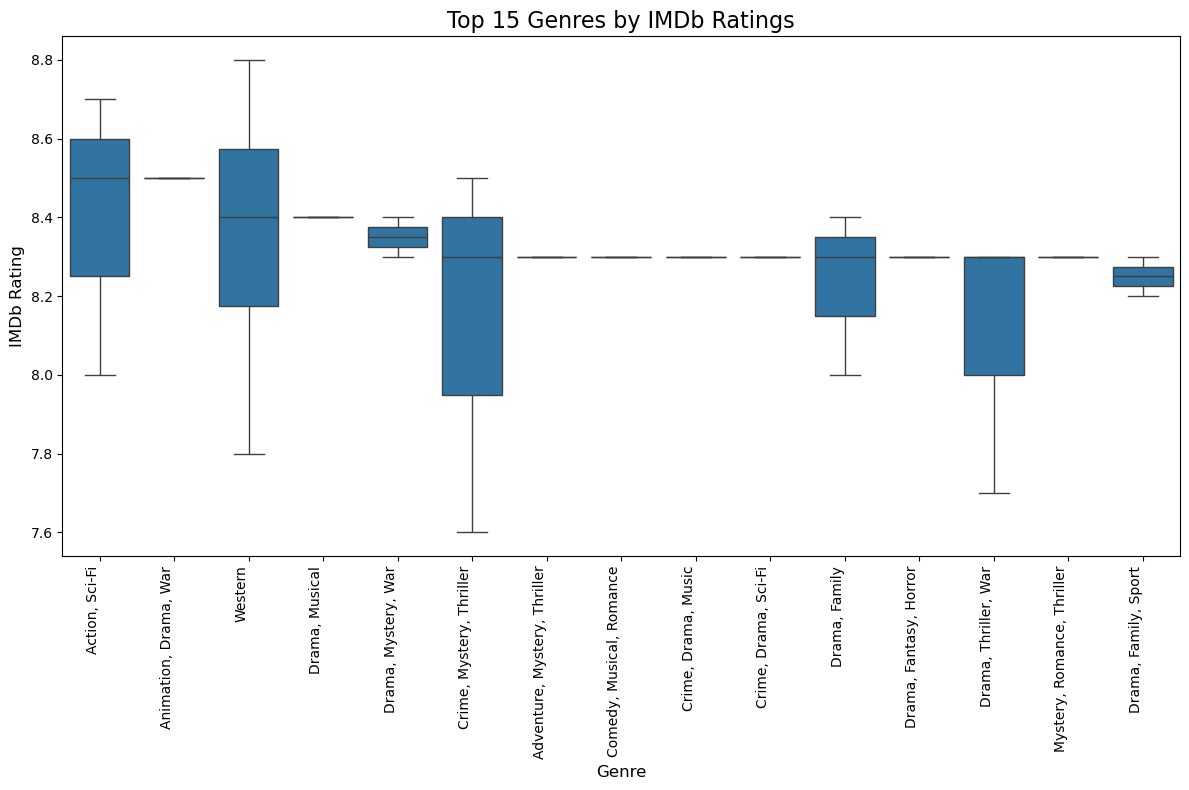

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/selammahmudali/Desktop/Project-Coding-for-data-science/imdb_top_1000.csv.xls")

# Step 1: Group data by genres and calculate median ratings for sorting
genre_stats = df.groupby('Genre')['IMDB_Rating'].median().sort_values(ascending=False)

# Step 2: Select the top 15 genres based on median ratings
top_15_genres = genre_stats.head(15).index

# Step 3: Filter the dataset to include only the top 15 genres
filtered_data = df[df['Genre'].isin(top_15_genres)]

# Step 4: Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='Genre', y='IMDB_Rating', order=top_15_genres)

# Step 5: Customize the plot
plt.title('Top 15 Genres by IMDb Ratings', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('IMDb Rating', fontsize=12)
plt.xticks(rotation=90, fontsize=10, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()



##### <u>Key Insights on Box Plot Analysis</u>
- <span style="color: Darkblue;">**Median Ratings**:</span>  High median ratings (≥ 8.5) are found in Animation, Drama, War, and Action, Sci-Fi, while Crime, Mystery, Thriller, and Drama, Fantasy, Horror have lower medians (8.2–8.3).

- <span style="color: Darkblue;">**Rating Variability (IQR)**:</span> Action, Sci-Fi, and Western show greater variability, whereas Drama, Mystery, War, and Drama, Family, Sport exhibit more consistent ratings.

- <span style="color: Darkblue;">**Outliers**:</span> Genres like Drama, Thriller, War feature ratings outside the whiskers, indicating extreme ratings.

- <span style="color: Darkblue;">**Top Performers**:</span> Animation, Drama, War has high median ratings with low variability, while Crime, Mystery, Thriller shows a broad range of ratings.

- <span style="color: Darkblue;">**Low Variation Genres**:</span> Drama, Musical and Drama, Family, Sport display compact boxes, indicating close ratings around their medians.

** * ** 

#### **2.2 Data Wrangling:**
After visualizing some of the key metrics, we can proceed to select the metrics that are relevant to the quiz and create a filtered csv file to work on.
The following columns  have been selected and saved to a new Csv file: **Series_Title, Released_Year, IMDb_Rating, Director, Star1,Star2, Star3, Star4**.


In [93]:

df=pd.read_csv("/Users/selammahmudali/Desktop/Project-Coding-for-data-science/imdb_top_1000.csv.xls")
#print(df)
selected_columns = df.iloc[:, [1, 2, 6, 9, 10, 11, 12, 13]]

selected_columns.to_csv("//Users/selammahmudali/Desktop/Project-Coding-for-data-science/imdb_top_1000_selected_columns.csv", index=False)


Then a load_movie_data function is created so that it is possible to recall it in the subsequent blocks of code.

In [101]:
def load_movie_data():
    # Load the dataset and return the DataFrame
    df = pd.read_csv("//Users/selammahmudali/Desktop/Project-Coding-for-data-science/imdb_top_1000_selected_columns.csv")
    print(df)
load_movie_data()


                 Series_Title Released_Year  IMDB_Rating  \
0    The Shawshank Redemption          1994          9.3   
1               The Godfather          1972          9.2   
2             The Dark Knight          2008          9.0   
3      The Godfather: Part II          1974          9.0   
4                12 Angry Men          1957          9.0   
..                        ...           ...          ...   
995    Breakfast at Tiffany's          1961          7.6   
996                     Giant          1956          7.6   
997     From Here to Eternity          1953          7.6   
998                  Lifeboat          1944          7.6   
999              The 39 Steps          1935          7.6   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Franci

### 3. **Quiz Generator:**




In the Quiz generator function, the libraries pandas, random, and numpy are imported. Additionally, the load_movie_data function, defined in the dataframe file, is invoked to read and retrieve the dataset.

In [104]:
import pandas as pd
import random
import numpy as np 
from dataframe import load_movie_data

This function, generate_quiz, creates movie-themed quiz questions with adjustable difficulty levels:

-Easy: Identify an actor from a movie.

-Medium: Name the movie's director.

-Hard: Recall the movie's release year.

In [4]:
def generate_quiz(difficulty):
    """Generates a quiz question based on the specified difficulty."""
    # Load the dataset
    df = load_movie_data()
    
    # Adjust difficulty
    if difficulty == "medium":
        selected_movie = df.sample(1).iloc[0]
        question = f"Who directed the movie '{selected_movie['Series_Title']}'?"
        correct_answer = selected_movie['Director']
        
        # Use numpy to generate unique random options
        all_directors = df["Director"].unique()
        options = np.random.choice(all_directors[all_directors != correct_answer], 3, replace=False).tolist()
        options.append(correct_answer)
        np.random.shuffle(options)  # Shuffle options
    
    elif difficulty == "easy":
        selected_movie = df.sample(1).iloc[0]
        question = f"Which actor starred in '{selected_movie['Series_Title']}'?"
        correct_answer = selected_movie['Star1'] or selected_movie['Star2'] or selected_movie['Star3'] or selected_movie['Star4']
        
        # Use numpy for generating random actor options
        all_actors = df['Star1'].dropna().unique()  # Get unique non-NaN actors
        options = np.random.choice(all_actors[all_actors != correct_answer], 3, replace=False).tolist()
        options.append(correct_answer)
        np.random.shuffle(options)
    
    elif difficulty == "hard":
        selected_movie = df.sample(1).iloc[0]
        question = f"What year was the movie '{selected_movie['Series_Title']}' released?"
        correct_answer = selected_movie['Released_Year']
        
        # Use numpy to pick random years
        all_years = df["Released_Year"].unique()
        options = np.random.choice(all_years[all_years != correct_answer], 3, replace=False).tolist()
        options.append(correct_answer)
        np.random.shuffle(options)
    
    return {
        "question": question,
        "options": options,
        "answer": correct_answer
    }


### **4. Performance Tracker:**

The score is given based on the difficulty level of the quiz. 

-Easy questions are worth 1 Point;

-Medium questions are worth 2 Points;

-Hard questions are worth 3 Points.


In [15]:
class PerformanceTracker:
    def __init__(self):
        self.correct_answers = 0
        self.total_questions = 0
        self.difficulty_weights = {"easy": 1, "medium": 2, "hard": 3}
        self.score = 0

    def update_score(self, correct, difficulty):
        self.total_questions += 1
        if correct:
            self.correct_answers += 1
            self.score += self.difficulty_weights[difficulty]

    def get_summary(self):
        return {
            "total_questions": self.total_questions,
            "correct_answers": self.correct_answers,
            "score": self.score
        }

### **5. Main:**
By recalling all the functions and classes from the previous code we can now run the quiz.
Furthermore, a plot performance function is introduced to plot the results of the user and show the performance summary. 

New CSV file with selected columns has been created.
Welcome to the Movie Quiz!


Select difficulty (easy, medium, hard):  hard



What year was the movie 'The Odd Couple' released?
1. 1998
2. 1972
3. 1968
4. 1983


Your choice (1-4):  2


Wrong! The answer was: 1968


Do you want to continue? (yes/no):  yes



What year was the movie 'Mandariinid' released?
1. 2013
2. 1924
3. 1987
4. 1928


Your choice (1-4):  3


Wrong! The answer was: 2013


Do you want to continue? (yes/no):  yes



What year was the movie 'Duck Soup' released?
1. 2018
2. 1975
3. 1993
4. 1933


Your choice (1-4):  4


Correct!


Do you want to continue? (yes/no):  yes



What year was the movie 'Captain Phillips' released?
1. 2005
2. 1980
3. 2013
4. 1958


Your choice (1-4):  2


Wrong! The answer was: 2013


Do you want to continue? (yes/no):  no



Quiz Completed! You answered 1 out of 4 questions correctly.
Your total score: 3


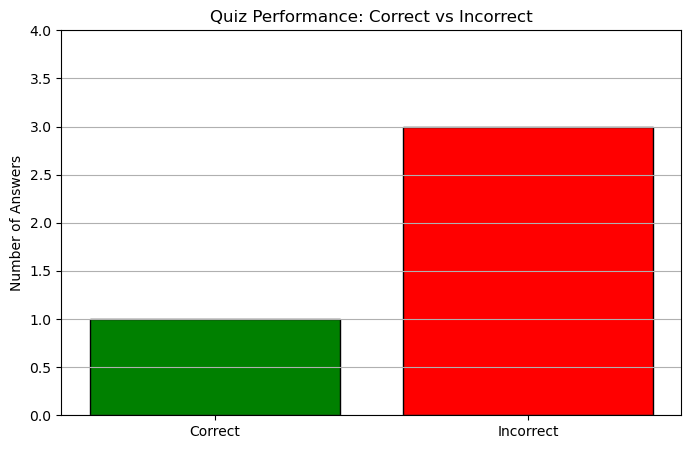

In [9]:
from dataframe import load_movie_data
from quiz_generator_3 import generate_quiz
from performance_tracker3 import PerformanceTracker
import matplotlib.pyplot as plt

def plot_performance(correct, incorrect):
    # Data
    categories = ['Correct', 'Incorrect']
    values = [correct, incorrect]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # Create bar plot
    ax.bar(categories, values, color=['green', 'red'], edgecolor='black')

    # Customize the plot
    ax.set_title('Quiz Performance: Correct vs Incorrect')
    ax.set_ylabel('Number of Answers')
    ax.set_ylim(0, max(values) + 1)  # Set y-axis limit for better visibility

    # Display the plot
    plt.grid(axis='y')  # Add grid lines for better readability
    plt.show()

def main():
    df = load_movie_data()

    # Initialize performance tracker
    tracker = PerformanceTracker()

    print("Welcome to the Movie Quiz!")
    
    # Validate difficulty input
    difficulty = ""
    while difficulty not in ["easy", "medium", "hard"]:
        difficulty = input("Select difficulty (easy, medium, hard): ").lower()
        if difficulty not in ["easy", "medium", "hard"]:
            print("Invalid difficulty. Please choose 'easy', 'medium', or 'hard'.")

    while True:
        # Generate a quiz
        quiz = generate_quiz(difficulty)
        print("\n" + quiz["question"])
        for i, option in enumerate(quiz["options"], 1):
            print(f"{i}. {option}")
        
        # Validate user answer input
        user_answer = None
        while user_answer not in range(1, 5):
            try:
                user_answer = int(input("Your choice (1-4): "))
                if user_answer not in range(1, 5):
                    print("Invalid choice. Please enter a number between 1 and 4.")
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 4.")

        # Check if the answer is correct
        correct = quiz["options"][user_answer - 1] == quiz["answer"]
        print("Correct!" if correct else f"Wrong! The answer was: {quiz['answer']}")

        # Update performance
        tracker.update_score(correct, difficulty)

        while True:
            cont = input("Do you want to continue? (yes/no): ").lower()
            if cont == "yes":
                break  # Exit the prompt loop and immediately return to the quiz
            elif cont == "no":
                # Exit the loop and proceed to show the summary
                summary = tracker.get_summary()
                correct_answers = summary['correct_answers']
                incorrect_answers = summary['total_questions'] - correct_answers
                
                print(f"\nQuiz Completed! You answered {correct_answers} out of {summary['total_questions']} questions correctly.")
                print(f"Your total score: {summary['score']}")
        
                # Plot performance
                plot_performance(correct_answers, incorrect_answers)
                return  # End the quiz function entirely
            else:
                print("Invalid input. Please enter 'yes' or 'no'.")

if __name__ == "__main__":
    main()
    